---
title: "Palmer Modeling"
author: Karisa Kopecek
date: today
format:
  html:
    embed-resources: true
    echo: true
    code-fold: true
---

---
title: "Palmer Modeling"
author: Karisa Kopecek
date: today
format:
  html:
    embed-resources: true
    echo: true
    code-fold: true
---


# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [2]:
#pip install palmerpenguins

In [3]:
# Code Here
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from palmerpenguins import load_penguins
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


We would need to dummify: the species, island, sex, and year variables (could do year or not, but I'm going to say yes to making year a dummy variable because I'd be interested in what is happening year vs other year rather than continously for years)

we would do something like:
pd.get_dummies(penguins) for each one

In [ ]:
#pd.get_dummies(penguins)

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [10]:
# Code Here
#simple linear regression
penguins = penguins.dropna()

bill_model = LinearRegression()
bill_model.fit(
    X=penguins[["bill_length_mm"]],
    y=penguins["bill_depth_mm"]
)

bill_model.coef_, bill_model.intercept_


(array([-0.08232675]), np.float64(20.786648668433827))

In [5]:
#simple linear regression predictions
penguins["bill_depth_predict"] = bill_model.predict(penguins[["bill_length_mm"]])
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_depth_predict
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,17.567673
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,17.534742
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,17.468881
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,17.765257
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,17.551207


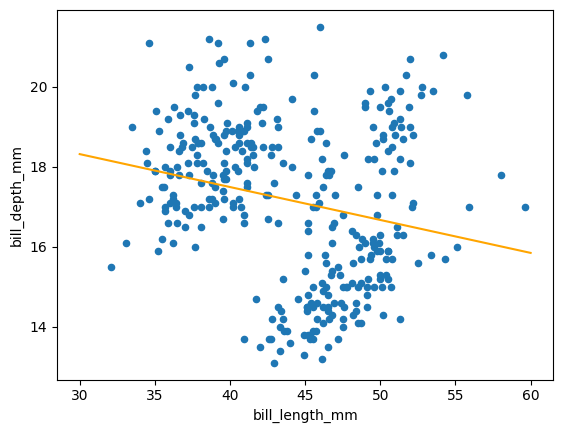

In [11]:
#simple linear regression graph
X_new = pd.DataFrame()
X_new["bill_length_mm"] = np.linspace(30, 60, num=1000)
y_new_ = pd.Series(
    bill_model.predict(X_new),
    index=X_new["bill_length_mm"]
)

penguins.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_.plot.line(c = "orange");

In [12]:
# Quadratic
penguins["bill_square"] = penguins["bill_length_mm"] ** 2

square_model = LinearRegression()
square_model.fit(
    X=penguins[["bill_length_mm", "bill_square"]],
    y=penguins["bill_depth_mm"]
)

square_model.coef_, square_model.intercept_


(array([-1.40407712,  0.01498039]), np.float64(49.49494362318971))

In [14]:
#quadratic predictions
penguins["quadratic_predict"] = square_model.predict(penguins[["bill_length_mm", "bill_square"]])
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_depth_predict,bill_square,quadratic_predict
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,17.567673,1528.81,17.497696
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,17.534742,1560.25,17.407049
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,17.468881,1624.09,17.240135
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,17.765257,1346.89,18.142249
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,17.551207,1544.49,17.451773


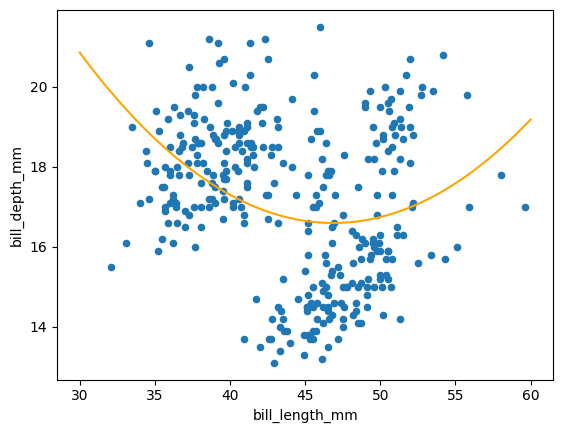

In [15]:
#quadratic graph

X_new = pd.DataFrame()
X_new["bill_length_mm"] = np.linspace(30, 60, num=1000)
X_new["bill_square"] = X_new["bill_length_mm"] ** 2
y_new_ = pd.Series(
    square_model.predict(X_new),
    index=X_new["bill_length_mm"]
)

penguins.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_.plot.line(c="orange");

In [16]:
#cubic
penguins["bill_cube"] = penguins["bill_length_mm"] ** 3

cube_model = LinearRegression()
cube_model.fit(
    X=penguins[["bill_length_mm", "bill_square", "bill_cube"]],
    y=penguins["bill_depth_mm"]
)

cube_model.coef_, cube_model.intercept_

(array([ 6.77963360e+00, -1.68915134e-01,  1.36264370e-03]),
 np.float64(-70.53172659621545))

In [17]:
# Cubic predictions
penguins["cubic_predict"] = cube_model.predict(penguins[["bill_length_mm", "bill_square", "bill_cube"]])
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_depth_predict,bill_square,quadratic_predict,bill_cube,cubic_predict
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,17.567673,1528.81,17.497696,59776.471,17.766833
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,17.534742,1560.25,17.407049,61629.875,17.693524
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,17.468881,1624.09,17.240135,65450.827,17.540285
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,17.765257,1346.89,18.142249,49430.863,18.127376
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,17.551207,1544.49,17.451773,60698.457,17.730509


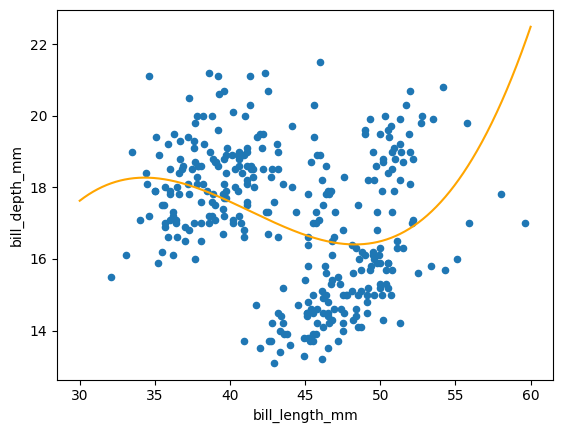

In [18]:
# Cubic graph
X_new = pd.DataFrame()
X_new["bill_length_mm"] = np.linspace(30, 60, num=1000)
X_new["bill_square"] = X_new["bill_length_mm"] ** 2
X_new["bill_cube"] = X_new["bill_length_mm"] ** 3
y_new_ = pd.Series(
    cube_model.predict(X_new),
    index=X_new["bill_length_mm"]
)

penguins.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_.plot.line(c="orange");

In [19]:
#degree

penguins["bill_power_4"] = penguins["bill_length_mm"] ** 4
penguins["bill_power_5"] = penguins["bill_length_mm"] ** 5
penguins["bill_power_6"] = penguins["bill_length_mm"] ** 6
penguins["bill_power_7"] = penguins["bill_length_mm"] ** 7
penguins["bill_power_8"] = penguins["bill_length_mm"] ** 8
penguins["bill_power_9"] = penguins["bill_length_mm"] ** 9
penguins["bill_power_10"] = penguins["bill_length_mm"] ** 10

degree10_features = ["bill_length_mm", "bill_square", "bill_cube", "bill_power_4", "bill_power_5",
                     "bill_power_6", "bill_power_7", "bill_power_8", "bill_power_9", "bill_power_10"]

degree10_model = LinearRegression()
degree10_model.fit(
    X=penguins[degree10_features],
    y=penguins["bill_depth_mm"]
)

degree10_model.coef_, degree10_model.intercept_

(array([ 9.30261877e-14,  4.30634238e-12,  1.56064756e-10,  4.04003958e-09,
         7.67183179e-08,  8.42985453e-07, -6.03511104e-08,  1.63196189e-09,
        -1.97124749e-11,  8.95411667e-14]),
 np.float64(-21.342766577098118))

In [20]:
# degree predictions
penguins["degree10_predict"] = degree10_model.predict(penguins[degree10_features])
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_depth_predict,bill_square,...,bill_cube,cubic_predict,bill_power_4,bill_power_5,bill_power_6,bill_power_7,bill_power_8,bill_power_9,bill_power_10,degree10_predict
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,17.567673,1528.81,...,59776.471,17.766833,2.337260e+06,9.138687e+07,3.573226e+09,1.397132e+11,5.462784e+12,2.135949e+14,8.351559e+15,18.392434
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,17.534742,1560.25,...,61629.875,17.693524,2.434380e+06,9.615801e+07,3.798241e+09,1.500305e+11,5.926206e+12,2.340851e+14,9.246363e+15,18.272268
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,17.468881,1624.09,...,65450.827,17.540285,2.637668e+06,1.062980e+08,4.283811e+09,1.726376e+11,6.957294e+12,2.803790e+14,1.129927e+16,17.969702
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,17.765257,1346.89,...,49430.863,18.127376,1.814113e+06,6.657794e+07,2.443410e+09,8.967315e+10,3.291005e+12,1.207799e+14,4.432621e+15,18.483352
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,17.551207,1544.49,...,60698.457,17.730509,2.385449e+06,9.374816e+07,3.684303e+09,1.447931e+11,5.690369e+12,2.236315e+14,8.788717e+15,18.335297


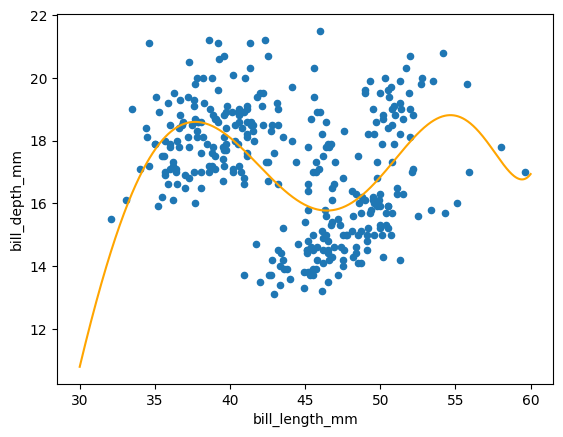

In [21]:
# degree graph
X_new = pd.DataFrame()
X_new["bill_length_mm"] = np.linspace(30, 60, num=1000)
X_new["bill_square"] = X_new["bill_length_mm"] ** 2
X_new["bill_cube"] = X_new["bill_length_mm"] ** 3
X_new["bill_power_4"] = X_new["bill_length_mm"] ** 4
X_new["bill_power_5"] = X_new["bill_length_mm"] ** 5
X_new["bill_power_6"] = X_new["bill_length_mm"] ** 6
X_new["bill_power_7"] = X_new["bill_length_mm"] ** 7
X_new["bill_power_8"] = X_new["bill_length_mm"] ** 8
X_new["bill_power_9"] = X_new["bill_length_mm"] ** 9
X_new["bill_power_10"] = X_new["bill_length_mm"] ** 10

y_new_ = pd.Series(
    degree10_model.predict(X_new),
    index=X_new["bill_length_mm"]
)

penguins.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_.plot.line(c="orange");

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

-The linear model and quadratic graph are both **underfitting**
-I can tell because the orange line shows a constant slope and for quadratic a constant curve, it doesn't really take into account the way that the actual points cluster. It looks like it is doing its own thing ragardless of the actual data points.

-The degree model is **overfitting**
-I can tell because the orange line seems higly affected by the points, even the points that are outliers. The line actually curves to try to meet some of the outlier points. It seems like this model with the orange line wouldn't generalize to new data very well if it is curving wildly to the outlier points.


The model that fits the data best is the cubic model because it shows a curved pattern for the data points without being too extreme like the degree model (doesn't swing towards outliers wildly).It is more complex than the linear or quadratic models also, so it does show some of the up and down in the data points. Overall, it is the model that seems most in between overfitting and underfitting and looks visually like it might generalize to new data best in my opinion.